# GoRiyadh Project – Riyadh Cafes Data Analysis

In this notebook, I analyze the Riyadh Cafes dataset as part of the GoRiyadh project.
The goal of this analysis is to explore customer satisfaction, engagement patterns, and geographic distribution in order to better understand the cafe market landscape in Riyadh.

## Part 1: Data Understanding & Cleaning

### Objective:
To explore the dataset structure, validate data quality, and prepare it for analysis.

### Description:
In this section, I examined the dataset dimensions, data types, and statistical summary.
I converted geographic coordinates into numeric format and handled invalid entries.
I ensured the dataset was clean and ready for accurate analytical processing.


In [1]:
!pip install -q kaggle

In [2]:
import kagglehub

path = kagglehub.dataset_download("riybot/riyadh-cafes")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'riyadh-cafes' dataset.
Path to dataset files: /kaggle/input/riyadh-cafes


In [3]:
import os
os.listdir(path)

['riyadh_cafes.csv']

In [4]:
import pandas as pd

df = pd.read_csv(path + "/riyadh_cafes.csv")
df.head()

,index,coffeeName,rating,rating_count,url,24_hours,lon,lan
0,0,Cacti Cafe,4.2,2212,https://www.google.com/maps/place/Cacti+Cafe/d...,True,46.7356133,24.8339855
1,1,فازا قهوة مختصة,4.3,889,https://www.google.com/maps/place/%D9%81%D8%A7...,False,46.6973369,24.7724577
2,2,ناريز,3.8,39,https://www.google.com/maps/place/%D9%86%D8%A7...,False,46.8521092,24.8072766
3,3,Fc Lounge - اف سي لاونج,3.5,539,https://www.google.com/maps/place/Fc+Lounge+-+...,True,46.7680585,24.8131149
4,4,PEAKS,4.6,25,https://www.google.com/maps/place/PEAKS/data=!...,False,46.6348092,24.742045


In [5]:
df.shape

(2609, 8)

**Observation:**
* The dataset contains 2,609 cafes.
* The dataset includes 8 main features describing each cafe.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         2609 non-null   int64  
 1   coffeeName    2609 non-null   object 
 2   rating        2609 non-null   float64
 3   rating_count  2609 non-null   int64  
 4   url           2609 non-null   object 
 5   24_hours      2609 non-null   bool   
 6   lon           2609 non-null   object 
 7   lan           2609 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 145.4+ KB


**Observation:**
* No missing values detected (all columns have 2,609 non-null entries).

* rating is numerical (float) and rating_count is integer.
* Geographic coordinates (lon, lan) are stored as object instead of numeric and may require type conversion.
* The dataset is structurally clean and complete.

In [7]:
df['lon'] = pd.to_numeric(df['lon'], errors='coerce')
df['lan'] = pd.to_numeric(df['lan'], errors='coerce')

In [8]:
df = df.dropna(subset=['lon','lan'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2605 entries, 0 to 2608
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         2605 non-null   int64  
 1   coffeeName    2605 non-null   object 
 2   rating        2605 non-null   float64
 3   rating_count  2605 non-null   int64  
 4   url           2605 non-null   object 
 5   24_hours      2605 non-null   bool   
 6   lon           2605 non-null   float64
 7   lan           2605 non-null   float64
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 165.4+ KB


In [10]:
df.describe()

,index,rating,rating_count,lon,lan
count,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000
mean,1305.069098,4.140461,261.202303,46.691294,24.710652
std,753.131314,0.615112,613.709891,0.101251,0.101774
min,0.000000,1.000000,1.000000,45.081137,24.126613
25%,654.000000,3.900000,12.000000,46.625770,24.628228
50%,1305.000000,4.200000,55.000000,46.692150,24.715007
75%,1957.000000,4.500000,248.000000,46.765118,24.788383
max,2608.000000,5.000000,10265.000000,46.928506,25.001962


**Observation:**
* The average rating is 4.14, indicating generally high customer satisfaction.
* Ratings range from 1.0 to 5.0, though the majority cluster above 3.9.
* Median rating (4.2) confirms strong overall performance.
* Average review count is ~261 reviews per cafe, but distribution is highly skewed.
* Some cafes have extremely high engagement (max = 10,265 reviews), indicating strong popularity concentration.
* 75% of cafes have fewer than 246 reviews, showing that most cafes have moderate visibility.

## Part 2: Ratings Analysis

### Objective:
To evaluate overall customer satisfaction levels across Riyadh cafes.

### Description:
In this section, I analyzed the average rating, distribution of ratings, and the percentage of highly rated cafes.
My goal was to understand the overall quality of the market and customer perception trends.

In [11]:
df['rating'].mean()

np.float64(4.140460652591171)

**Observation:**
* The average cafe rating is 4.14 out of 5, indicating strong overall customer satisfaction across Riyadh cafes.
* The market reflects generally positive customer experiences.

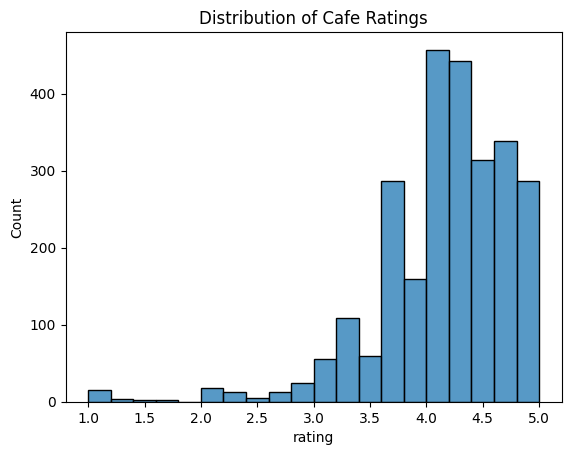

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['rating'], bins=20)
plt.title("Distribution of Cafe Ratings")
plt.show()

### Observation:

- Ratings are heavily concentrated between 3.8 and 4.6.
- Very few cafes fall below rating 3.0.
- The distribution indicates a highly competitive and quality-driven cafe market in Riyadh.

In [13]:
(df['rating'] > 4).mean() * 100

np.float64(62.149712092130514)

### Observation:

- Approximately 62% of cafes have ratings above 4.0.
- This confirms that the majority of cafes in Riyadh maintain strong customer satisfaction levels.
- The market demonstrates a high overall service standard.

In [14]:
df['rating_count'].mean()

np.float64(261.20230326295587)

### Observation:

- The average number of reviews per cafe is approximately 261.
- This suggests moderate overall customer engagement.
- However, average values may be influenced by highly popular cafes.

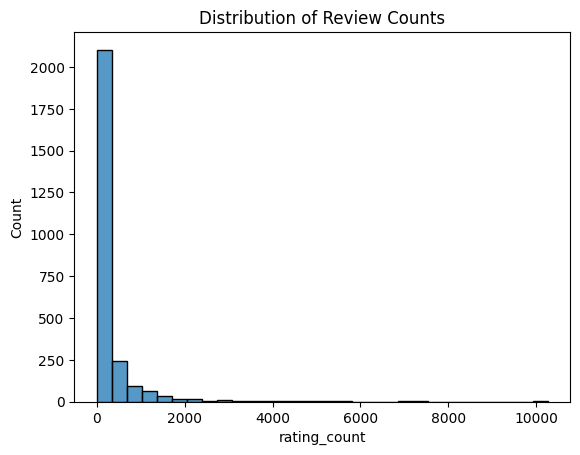

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['rating_count'], bins=30)
plt.title("Distribution of Review Counts")
plt.show()

### Observation:

- Review counts are highly skewed to the right.
- The majority of cafes have relatively low review counts.
- A small number of cafes dominate with extremely high engagement (reaching over 10,000 reviews).
- Popularity is concentrated among a limited number of leading cafes.

## Part 3: Popularity Analysis (Review Count)

### Objective:
To assess customer engagement and evaluate how popularity is distributed among cafes.

### Description:
Here, I examined the average number of reviews, distribution patterns, and the relationship between rating and review count.
This allowed me to determine whether popularity influences perceived quality.

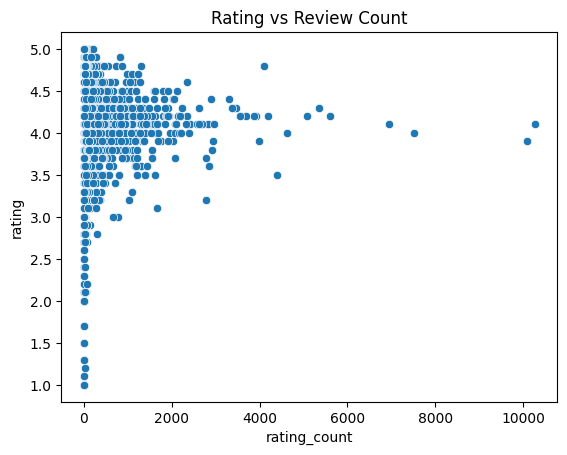

In [16]:
sns.scatterplot(x='rating_count', y='rating', data=df)
plt.title("Rating vs Review Count")
plt.show()

### Observation:

- There is no strong linear relationship between rating and review count.
- Highly rated cafes exist across both low and high review volumes.
- Popularity does not necessarily guarantee higher ratings.
- Customer satisfaction appears relatively stable regardless of engagement level.

## Part 4: 24-Hour Cafes Analysis

### Objective:
To analyze whether operating hours influence customer satisfaction.

### Description:
In this section, I compared 24-hour cafes with standard-hour cafes and evaluated differences in average ratings.
My aim was to determine whether extended availability impacts service perception.

In [17]:
df['24_hours'].value_counts()

,count
24_hours,
False,1895
True,710


### Observation:

- 710 cafes operate 24 hours, while 1,895 follow standard operating hours.
- 24-hour cafes represent a minority within the Riyadh cafe market.
- Most cafes operate within limited daily business hours.

In [18]:
df.groupby('24_hours')['rating'].mean()

,rating
24_hours,
False,4.166121
True,4.071972


### Observation:

- The average rating for non-24-hour cafes is 4.17.
- The average rating for 24-hour cafes is 4.07.
- The difference is minimal, indicating that operating hours do not significantly impact customer satisfaction.
- Service quality appears relatively independent of 24-hour availability.

## Part 5: Geographic Distribution Analysis

### Objective:
To understand the spatial distribution of cafes across Riyadh.

### Description:
I visualized cafe locations using geographic coordinates to identify clustering patterns.
This helped me understand commercial concentration areas and overall geographic market distribution.

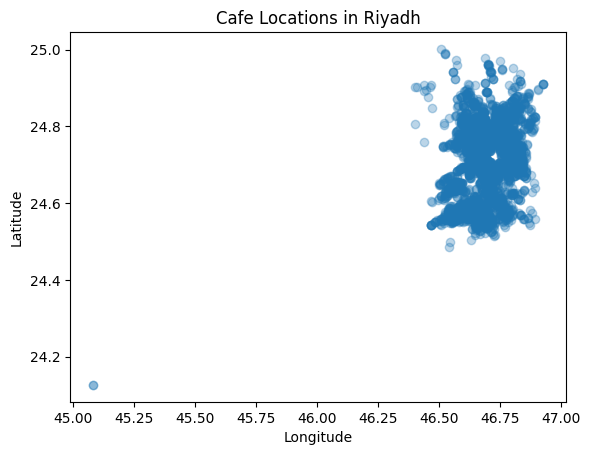

In [19]:
plt.scatter(df['lon'], df['lan'], alpha=0.3)
plt.title("Cafe Locations in Riyadh")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Observation:

- Cafe locations are heavily clustered within a specific geographic area in Riyadh.
- The distribution is not uniform across the city.
- This suggests high commercial concentration zones.
- A small number of outlier locations exist outside the main cluster.

## Final Insights

- The Riyadh cafe market demonstrates strong overall customer satisfaction.
- Over 62% of cafes are rated above 4.0.
- Popularity is concentrated among a limited number of leading cafes.
- Operating 24 hours does not significantly impact rating performance.
- Cafe distribution is geographically clustered in high-demand commercial areas.